In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
#Combine test and train into one file
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [4]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [5]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


In [12]:
#Distribution of the variable Item_Type


In [9]:
#Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (data[col].value_counts())
    
##The output gives us following observations:

##Item_Fat_Content: Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. 
##Also, some of ‘Regular’ are mentioned as ‘regular’.

##Item_Type: Not all categories have substantial numbers. 
##It looks like combining them can give better results.


Frequency of Categories for varible Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

F

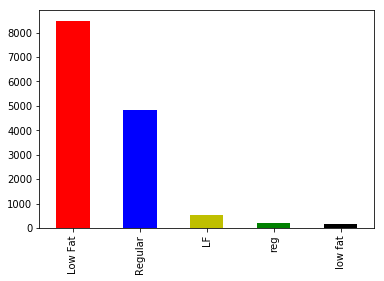

In [11]:
data['Item_Fat_Content'].value_counts().plot(kind="bar",color=['r','b','y','green','black'])

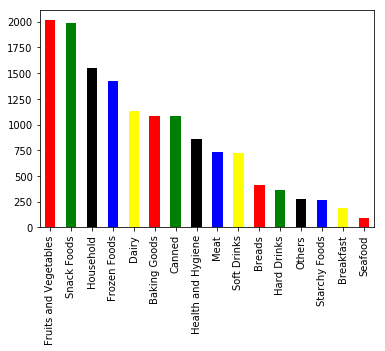

In [13]:
data['Item_Type'].value_counts().plot(kind="bar", color=['r','green','black','b','yellow'])


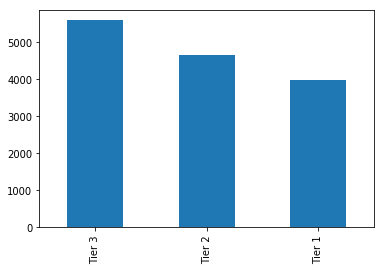

In [17]:
data['Outlet_Location_Type'].value_counts().plot(kind="bar")


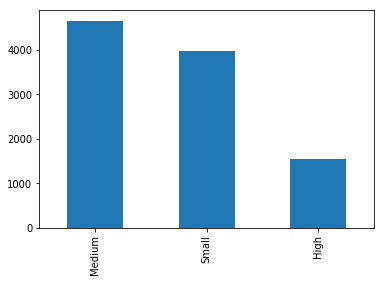

In [18]:
data['Outlet_Size'].value_counts().plot(kind="bar")

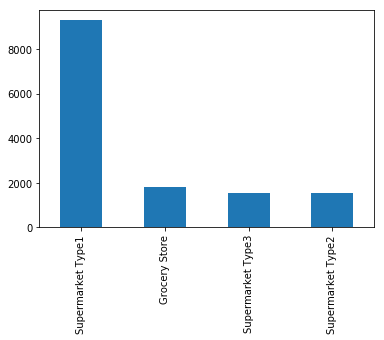

In [20]:
data['Outlet_Type'].value_counts().plot(kind="bar")

In [21]:
#Modify categories of Item_Fat_Content

#Change categories of low fat:
print ('Original Categories:')
print (data['Item_Fat_Content'].value_counts())

print ('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print (data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


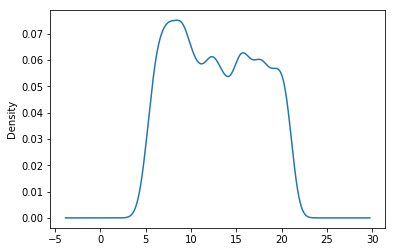

In [22]:
#numeric value
data['Item_Weight'].plot.density()

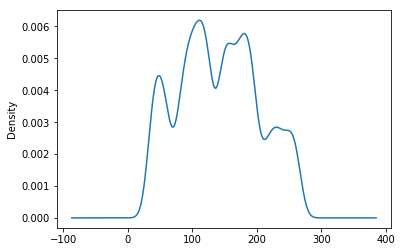

In [23]:
data['Item_MRP'].plot.density()

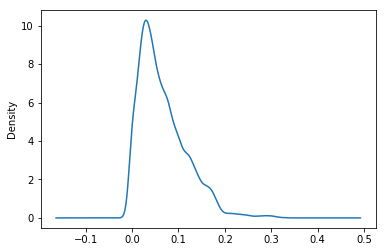

In [24]:
data['Item_Visibility'].plot.density()

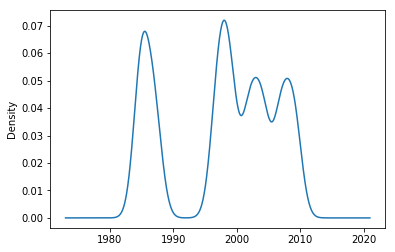

In [25]:
data['Outlet_Establishment_Year'].plot.density()

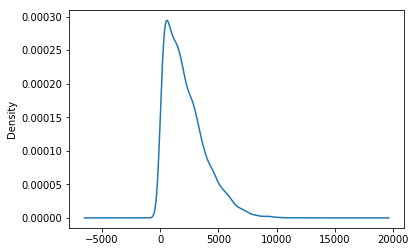

In [26]:
data['Item_Outlet_Sales'].plot.density()

In [27]:
#Data Cleaning
#Check missing values:
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [28]:
data.Item_Outlet_Sales = data.Item_Outlet_Sales.fillna(data.Item_Outlet_Sales.mean())
data.Item_Weight = data.Item_Weight.fillna(data.Item_Weight.mean())
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [29]:
data.Outlet_Size = data.Outlet_Size.fillna('Medium')
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content             0
Item_Identifier              0
Item_MRP                     0
Item_Outlet_Sales            0
Item_Type                    0
Item_Visibility              0
Item_Weight                  0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Type                  0
source                       0
dtype: int64

In [30]:
data.groupby('Outlet_Identifier').Outlet_Size.value_counts(dropna=False)
## see that only OUT010, OUT017, OUT045 HAS NA values

Outlet_Identifier  Outlet_Size
OUT010             Medium          925
OUT013             High           1553
OUT017             Medium         1543
OUT018             Medium         1546
OUT019             Small           880
OUT027             Medium         1559
OUT035             Small          1550
OUT045             Medium         1548
OUT046             Small          1550
OUT049             Medium         1550
Name: Outlet_Size, dtype: int64

In [31]:
data.loc[data.Outlet_Identifier.isin(['OUT010','OUT017','OUT045']), 'Outlet_Size'] = 'Small'
data.Outlet_Size.value_counts()

Small     7996
Medium    4655
High      1553
Name: Outlet_Size, dtype: int64

In [32]:
### Feature Engineering ###

data.min()

Item_Fat_Content                   Low Fat
Item_Identifier                      DRA12
Item_MRP                             31.29
Item_Outlet_Sales                    33.29
Item_Type                     Baking Goods
Item_Visibility                          0
Item_Weight                          4.555
Outlet_Establishment_Year             1985
Outlet_Identifier                   OUT010
Outlet_Location_Type                Tier 1
Outlet_Size                           High
Outlet_Type                  Grocery Store
source                                test
dtype: object

In [33]:
## Notice that Item_Visibility has a minimum value of 0. It seems absurd that an item has 0 
## visibility. Therefore, we will modify that column.
## Here we Group by Item_Identifier, calculate mean for each group(excluding zero values), then we proceed
## to replace the zero values in each group with the group's mean.

## we have to replace 0's by na because, mean() doesnt support exclude '0' parameter 
##but it includes exclude nan parameter which is true by default

data.loc[data.Item_Visibility == 0, 'Item_Visibility'] = np.nan

#aggregate by Item_Identifier
IV_mean = data.groupby('Item_Identifier').Item_Visibility.mean()
IV_mean

Item_Identifier
DRA12    0.044920
DRA24    0.045646
DRA59    0.148204
DRB01    0.091127
DRB13    0.007648
DRB24    0.020596
DRB25    0.079407
DRB48    0.026970
DRC01    0.020653
DRC12    0.037862
DRC13    0.032467
DRC24    0.026913
DRC25    0.052616
DRC27    0.066423
DRC36    0.052147
DRC49    0.070950
DRD01    0.066330
DRD12    0.084742
DRD13    0.049125
DRD15    0.064930
DRD24    0.035205
DRD25    0.091538
DRD27    0.026416
DRD37    0.015021
DRD49    0.167987
DRD60    0.040369
DRE01    0.179808
DRE03    0.026061
DRE12    0.070835
DRE13    0.031673
           ...   
NCX05    0.110962
NCX06    0.017934
NCX17    0.113709
NCX18    0.010367
NCX29    0.101920
NCX30    0.028864
NCX41    0.019212
NCX42    0.006482
NCX53    0.016210
NCX54    0.051698
NCY05    0.059645
NCY06    0.065816
NCY17    0.163222
NCY18    0.033510
NCY29    0.088295
NCY30    0.028140
NCY41    0.086582
NCY42    0.016440
NCY53    0.064031
NCY54    0.191145
NCZ05    0.063030
NCZ06    0.102096
NCZ17    0.086140
NCZ18    0.2

In [44]:
data.Item_Visibility.fillna(0, inplace=True)

#replace 0 values
for index, row in data.iterrows():
    if(row.Item_Visibility == 0):
        data.loc[index, 'Item_Visibility'] = IV_mean[row.Item_Identifier]
        print(combined.loc[index, 'Item_Visibility'])
        
data.Item_Visibility.describe()
## see that min value is not zero anymore

count    14204.000000
mean         0.070458
std          0.050086
min          0.003575
25%          0.031381
50%          0.058064
75%          0.098042
max          0.328391
Name: Item_Visibility, dtype: float64

In [35]:
#Determine the years of operation of a store
#Years:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [36]:
data['MRP_Factor'] = pd.cut(data.Item_MRP, [0,70,130,201,400], labels=['Low', 'Medium', 'High', 'Very High'])

In [52]:
 #Item type combine:
data['Item_Identifier'].value_counts()
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts() 

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [53]:
 #Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet', 'MRP_Factor']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [54]:
 #One Hot Coding: dummy varriables

data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet', 'MRP_Factor'])

In [55]:
data.dtypes
#Here we can see that all variables are now float and each category has a new variable.

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
Outlet_1                       uint8
O

In [57]:
data[['Item_Fat_Content_0','Item_Fat_Content_1']].head(10)

,Item_Fat_Content_0,Item_Fat_Content_1
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,0,1
6,0,1
7,1,0
8,0,1
9,0,1


In [58]:
### Exporting Data ###
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year',],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
#train.to_csv("train_modified.csv",index=False)
#test.to_csv("test_modified.csv",index=False)

In [59]:
train.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,...,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9,MRP_Factor_0,MRP_Factor_1,MRP_Factor_2,MRP_Factor_3
0,FDA15,249.8092,3735.1380,0.016047,9.30,OUT049,14,1,0,1,...,0,0,0,0,0,1,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,OUT018,4,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,OUT049,14,1,0,1,...,0,0,0,0,0,1,1,0,0,0
3,FDX07,182.0950,732.3800,0.022930,19.20,OUT010,15,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,NCD19,53.8614,994.7052,0.014670,8.93,OUT013,26,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [60]:
test.head()

,Item_Identifier,Item_MRP,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9,MRP_Factor_0,MRP_Factor_1,MRP_Factor_2,MRP_Factor_3
8523,FDW58,107.8622,0.007565,20.750000,OUT049,14,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
8524,FDW14,87.3198,0.038428,8.300000,OUT017,6,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
8525,NCN55,241.7538,0.099575,14.600000,OUT010,15,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8526,FDQ58,155.0340,0.015388,7.315000,OUT017,6,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8527,FDY38,234.2300,0.118599,12.792854,OUT027,28,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


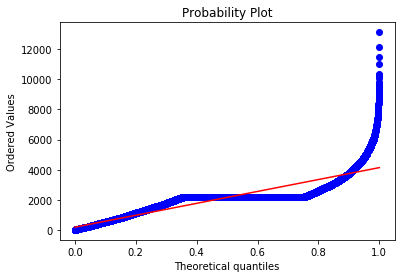

In [62]:
## lets draw some plots to see that the regression assumptions are not voilated
## QQ plot

import pylab 
import scipy.stats as stats

quantile = data.Item_Outlet_Sales

stats.probplot(quantile, dist="uniform", plot=pylab)
pylab.show()

## the line is almost linear except for the end points 

In [63]:
### Model Building ###

#Define target and ID columns:

##Since I’ll be making many models, instead of repeating the codes again and again, 
##I would like to define a generic function which takes the algorithm and data as input and makes the model
##performs cross-validation and generates submission

# we want to predict target
target = 'Item_Outlet_Sales'

#below are just identifiers which we dont want to fit
IDcol = ['Item_Identifier','Outlet_Identifier']

from sklearn import metrics
from sklearn.model_selection import cross_validate, cross_val_score
import matplotlib.pyplot as plt

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename, resid=False, transform=False):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    residuals = dtrain_predictions - dtrain[target]
    if(transform == True):
        train_mod = train.copy(deep = True)
        train_mod[target] = train_mod[target].apply(np.log)
        dtrain_predictions = np.exp(dtrain_predictions)
        #print(dtrain_predictions)

    
    #residuals vs fitted plot
    if(resid == True):
        plt.scatter(dtrain_predictions, residuals)
        plt.xlabel('fitted values')
        plt.ylabel('residuals')
        plt.show()
    
    #Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

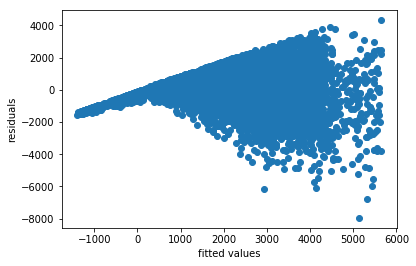


Model Report
RMSE : 1128
CV Score : Mean - 1129 | Std - 43.61 | Min - 1074 | Max - 1211


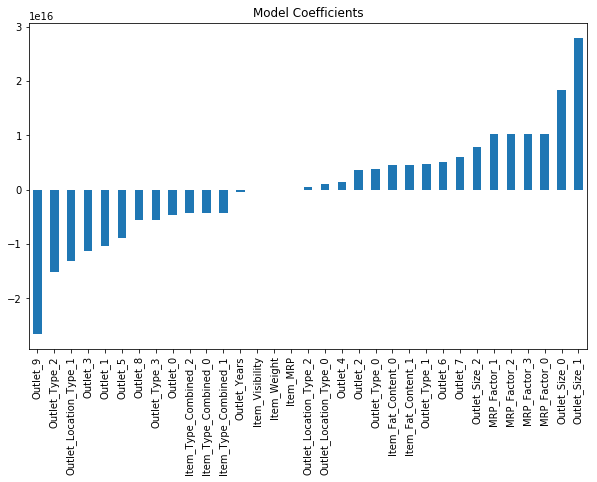

In [64]:
### Linear Regression Model

from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = LinearRegression(normalize=True)
pred1 = np.nan
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv', resid=True)


coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients', figsize=(10,6))

#if you notice the coefficients, they are very large in magnitude which signifies overfitting. 
#To cater to this, we will use a ridge regression model.

## residual vs fitted plot and model coefficients plot is given below


Model Report
RMSE : 1059
CV Score : Mean - 1091 | Std - 43.24 | Min - 1005 | Max - 1177


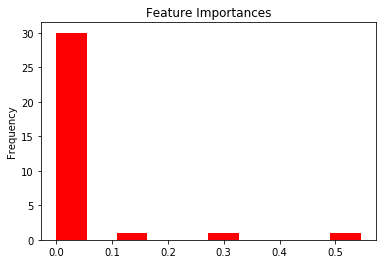

In [66]:
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='hist', title='Feature Importances',color="red")


Model Report
RMSE : 1073
CV Score : Mean - 1084 | Std - 43.56 | Min - 1021 | Max - 1162


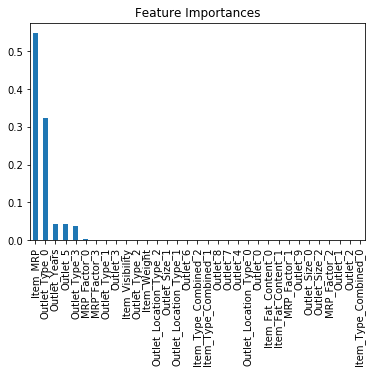

In [67]:
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg5 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
modelfit(alg5, train, test, predictors, target, IDcol, 'alg5.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')